In [52]:
!pip install -U kaleido

In [53]:
!pip install -Uqq pycaret-ts-alpha

In [ ]:
#@title Import python libraries
#!pip install -Uqq pycaret

# Standard Library Imports
from pathlib import Path

from pycaret.utils import enable_colab
enable_colab()
%matplotlib inline

Colab mode enabled.


In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [64]:
data = pd.read_csv("https://github.com/faizer1989/AI_recipes/raw/main/datasets/demand_forecasting_train.csv")

In [65]:
data.head()

record_ID      week  store_id  sku_id  total_price  base_price  \
0          1  17/01/11      8091  216418      99.0375    111.8625   
1          2  17/01/11      8091  216419      99.0375     99.0375   
2          3  17/01/11      8091  216425     133.9500    133.9500   
3          4  17/01/11      8091  216233     133.9500    133.9500   
4          5  17/01/11      8091  217390     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          52

In [67]:
data=data.dropna()
data['date'] = pd.to_datetime(data['week'])
data.drop('week', axis=1, inplace=True)
data.head()

record_ID  store_id  sku_id  total_price  base_price  is_featured_sku  \
0          1      8091  216418      99.0375    111.8625                0   
1          2      8091  216419      99.0375     99.0375                0   
2          3      8091  216425     133.9500    133.9500                0   
3          4      8091  216233     133.9500    133.9500                0   
4          5      8091  217390     141.0750    141.0750                0   

   is_display_sku  units_sold       date  
0               0          20 2011-01-17  
1               0          28 2011-01-17  
2               0          19 2011-01-17  
3               0          44 2011-01-17  
4               0          52 2011-01-17

In [68]:
data.set_index('date', inplace=True) #set date as index

In [69]:
demand_forecast = data.groupby('date').sum()['units_sold']
demand_forecast.head()

date
2011-01-08    44134
2011-01-17    60029
2011-01-24    56752
2011-01-31    51467
2011-02-05    46077
Name: units_sold, dtype: int64

# Available Models

In [70]:
exp = TimeSeriesExperiment()
exp.setup(demand_forecast)
exp.models()

>>> from pycaret.time_series import TSForecastingExperiment


ValueError: ignored

# Plotting Data

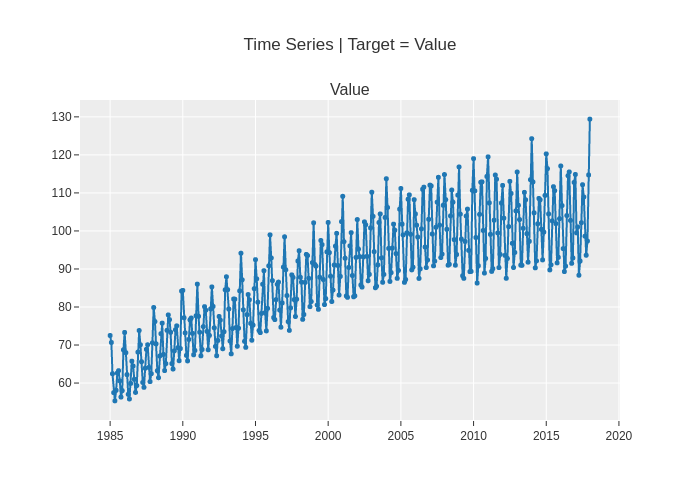

In [ ]:
# Without any argument, this will plot the original dataset
exp.plot_model()

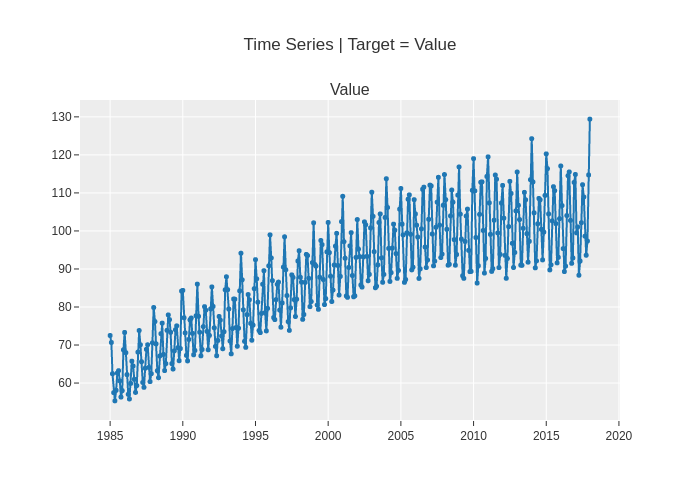

In [ ]:
# Without an estimator argument, this will plot the original dataset
exp.plot_model(plot="ts")

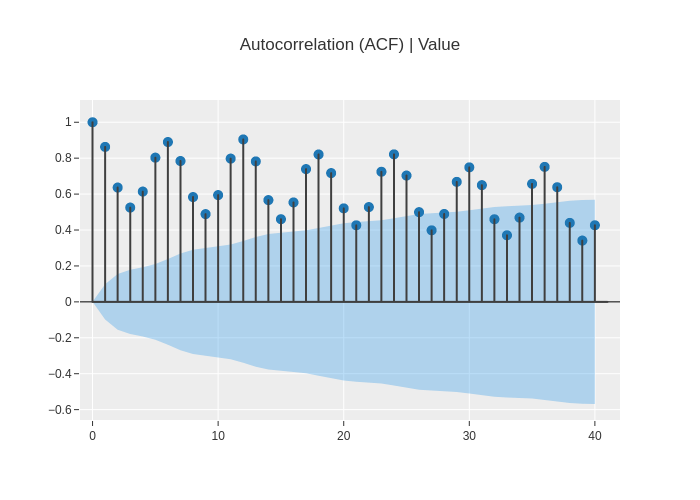

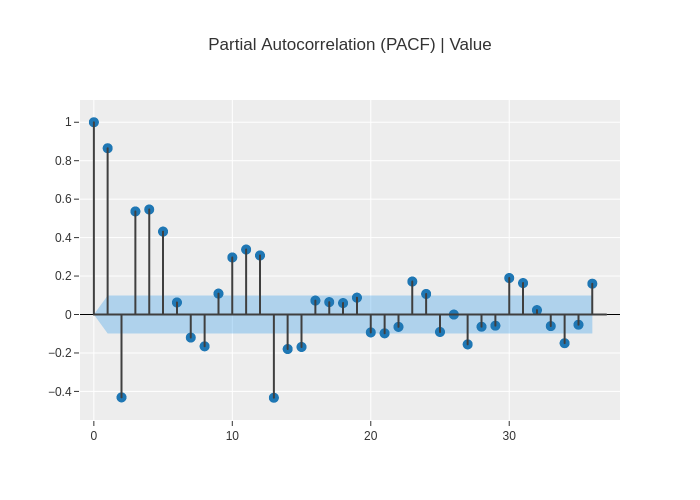

In [ ]:
# ACF and PACF for the original dataset
exp.plot_model(plot="acf")

# NOTE: you can customize the plots with kwargs - e.g. number of lags, figure size (width, height), etc
# data_kwargs such as `nlags` are passed to the underlying functon that gets the ACF values
# figure kwargs such as `fig_size` & `fig_template` are passed to plotly and can have any value that plotly accepts
exp.plot_model(plot="pacf", data_kwargs={'nlags':36, }, fig_kwargs={'fig_size': [800, 500], 'fig_template': 'simple_white'})

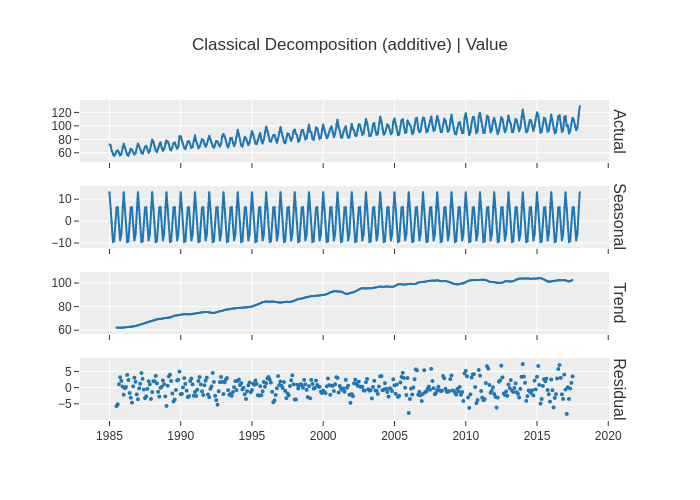

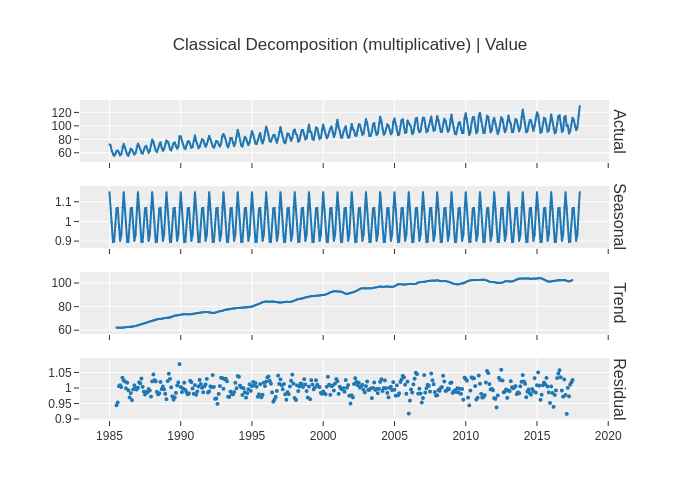

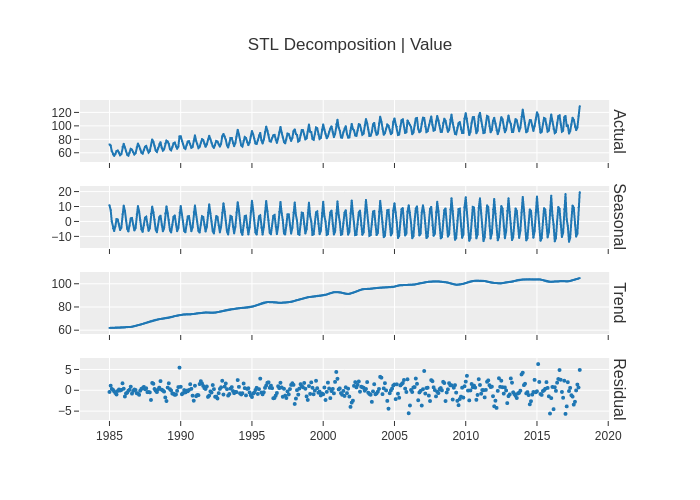

In [ ]:
exp.plot_model(plot="decomp_classical")
exp.plot_model(plot="decomp_classical", data_kwargs={'type': 'multiplicative'})
exp.plot_model(plot="decomp_stl")

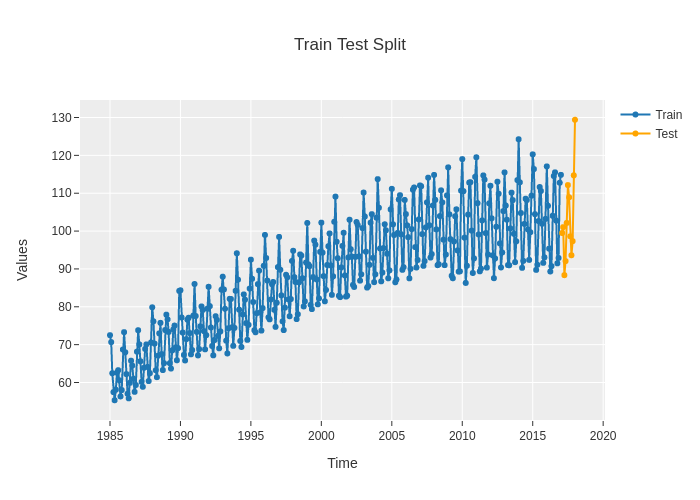

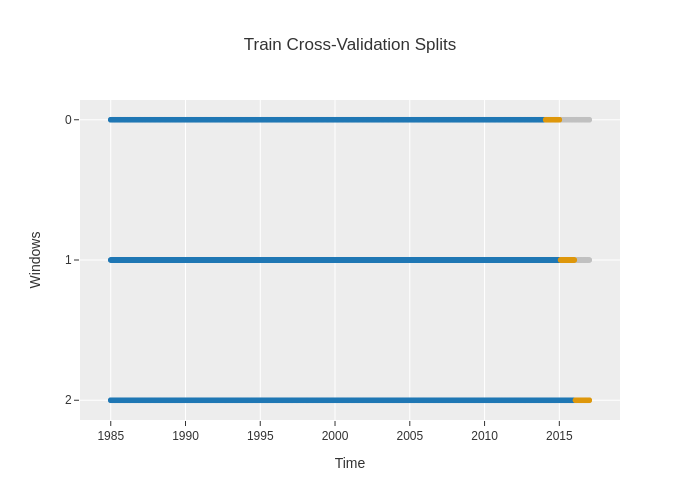

In [ ]:
# Show the train-test splits on the dataset
# Internally split - len(fh) as test set, remaining used as test set
exp.plot_model(plot="train_test_split")

# Show the Cross Validation splits inside the train set
exp.plot_model(plot="cv")

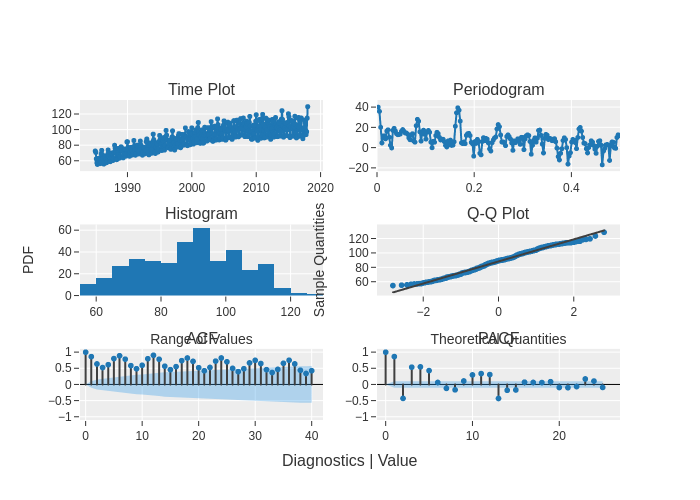

In [ ]:
# Plot diagnostics
exp.plot_model(plot="diagnostics")

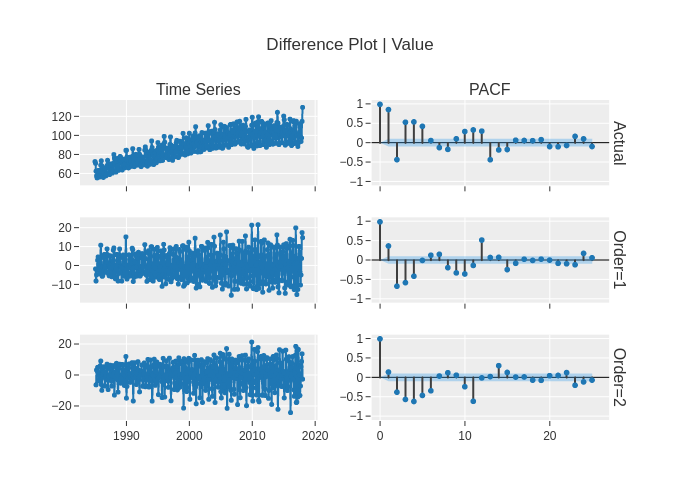

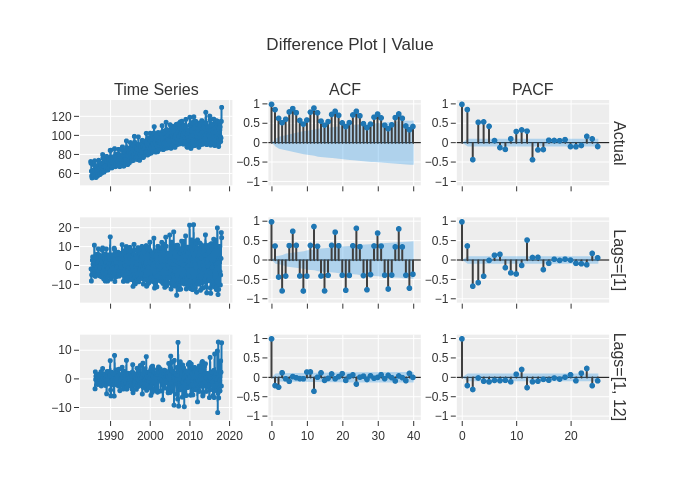

In [ ]:
# Plot differences along with diagnostics such as ACF and PACF

# Row 1: Original
# Row 2: d = 1
# Row 3: d = 2
exp.plot_model(plot="diff", data_kwargs={"order_list": [1, 2], "pacf": True})

# Row 1: Original
# Row 2: d = 1
# Row 3: First (d = 1) then (D = 1, s = 12)
#   - Corresponds to applying a standard first difference to handle trend, and
#     followed by a seasonal difference (at lag 12) to attempt to account for
#     seasonal dependence.
# Ref: https://www.sktime.org/en/v0.8.0/api_reference/modules/auto_generated/sktime.transformations.series.difference.Differencer.html
exp.plot_model(plot="diff", data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True})

# Tests

In [ ]:
exp.check_stats(alpha = 0.2)

Test   Test Name    Data             Property  \
0        Summary  Statistics  Actual               Length   
1        Summary  Statistics  Actual                 Mean   
2        Summary  Statistics  Actual               Median   
3        Summary  Statistics  Actual   Standard Deviation   
4        Summary  Statistics  Actual             Variance   
5        Summary  Statistics  Actual             Kurtosis   
6        Summary  Statistics  Actual             Skewness   
7        Summary  Statistics  Actual    # Distinct Values   
8    White Noise   Ljung-Box  Actual       Test Statictic   
9    White Noise   Ljung-Box  Actual       Test Statictic   
10   White Noise   Ljung-Box  Actual              p-value   
11   White Noise   Ljung-Box  Actual              p-value   
12   White Noise   Ljung-Box  Actual          White Noise   
13   White Noise   Ljung-Box  Actual          White Noise   
14  Stationarity         ADF  Actual         Stationarity   
15  Stationarity         ADF  Actual              p-value   
16  Stationarity         ADF  Actual       Test Statistic   
17  Stationarity         ADF  Actual    Critical Value 1%   
18  Stationarity         ADF  Actual    Critical Value 5%   
19  Stationarity         ADF  Actual   Critical Value 10%   
20  Stationarity        KPSS  Actual   Trend Stationarity   
21  Stationarity        KPSS  Actual              p-value   
22  Stationarity        KPSS  Actual       Test Statistic   
23  Stationarity        KPSS  Actual   Critical Value 10%   
24  Stationarity        KPSS  Actual    Critical Value 5%   
25  Stationarity        KPSS  Actual  Critical Value 2.5%   
26  Stationarity        KPSS  Actual    Critical Value 1%   
27     Normality     Shapiro  Actual            Normality   
28     Normality     Shapiro  Actual              p-value   

                    Setting        Value  
0                                  397.0  
1                              88.847218  
2                                89.7795  
3                              15.387834  
4                             236.785425  
5                              -0.694201  
6                              -0.073096  
7                                  397.0  
8   {'alpha': 0.2, 'K': 24}  4673.514604  
9   {'alpha': 0.2, 'K': 48}  7933.054294  
10  {'alpha': 0.2, 'K': 24}          0.0  
11  {'alpha': 0.2, 'K': 48}          0.0  
12  {'alpha': 0.2, 'K': 24}        False  
13  {'alpha': 0.2, 'K': 48}        False  
14           {'alpha': 0.2}         True  
15           {'alpha': 0.2}     0.186215  
16           {'alpha': 0.2}     -2.25699  
17           {'alpha': 0.2}    -3.447631  
18           {'alpha': 0.2}    -2.869156  
19           {'alpha': 0.2}    -2.570827  
20           {'alpha': 0.2}        False  
21           {'alpha': 0.2}         0.01  
22           {'alpha': 0.2}     0.505103  
23           {'alpha': 0.2}        0.119  
24           {'alpha': 0.2}        0.146  
25           {'alpha': 0.2}        0.176  
26           {'alpha': 0.2}        0.216  
27           {'alpha': 0.2}        False  
28           {'alpha': 0.2}     0.001334

In [ ]:
# Options are: 'all', 'summary', 'white_noise' 'stationarity', 'adf', 'kpss', 'normality'
exp.check_stats(test="summary")

Test   Test Name    Data            Property Setting       Value
0  Summary  Statistics  Actual              Length          397.000000
1  Summary  Statistics  Actual                Mean           88.847218
2  Summary  Statistics  Actual              Median           89.779500
3  Summary  Statistics  Actual  Standard Deviation           15.387834
4  Summary  Statistics  Actual            Variance          236.785425
5  Summary  Statistics  Actual            Kurtosis           -0.694201
6  Summary  Statistics  Actual            Skewness           -0.073096
7  Summary  Statistics  Actual   # Distinct Values          397.000000

In [ ]:
# Setting denotes alpha value used (for most tests). For white noise, it denotes the lags used to test
exp.check_stats(test='stationarity')

Test Test Name    Data             Property          Setting  \
0   Stationarity       ADF  Actual         Stationarity  {'alpha': 0.05}   
1   Stationarity       ADF  Actual              p-value  {'alpha': 0.05}   
2   Stationarity       ADF  Actual       Test Statistic  {'alpha': 0.05}   
3   Stationarity       ADF  Actual    Critical Value 1%  {'alpha': 0.05}   
4   Stationarity       ADF  Actual    Critical Value 5%  {'alpha': 0.05}   
5   Stationarity       ADF  Actual   Critical Value 10%  {'alpha': 0.05}   
6   Stationarity      KPSS  Actual   Trend Stationarity  {'alpha': 0.05}   
7   Stationarity      KPSS  Actual              p-value  {'alpha': 0.05}   
8   Stationarity      KPSS  Actual       Test Statistic  {'alpha': 0.05}   
9   Stationarity      KPSS  Actual   Critical Value 10%  {'alpha': 0.05}   
10  Stationarity      KPSS  Actual    Critical Value 5%  {'alpha': 0.05}   
11  Stationarity      KPSS  Actual  Critical Value 2.5%  {'alpha': 0.05}   
12  Stationarity      KPSS  Actual    Critical Value 1%  {'alpha': 0.05}   

       Value  
0      False  
1   0.186215  
2   -2.25699  
3  -3.447631  
4  -2.869156  
5  -2.570827  
6      False  
7       0.01  
8   0.505103  
9      0.119  
10     0.146  
11     0.176  
12     0.216

In [ ]:
# For white noise, Setting it denotes the lags used to test
exp.check_stats(test='white_noise')

Test  Test Name    Data        Property                   Setting  \
0  White Noise  Ljung-Box  Actual  Test Statictic  {'alpha': 0.05, 'K': 24}   
1  White Noise  Ljung-Box  Actual  Test Statictic  {'alpha': 0.05, 'K': 48}   
2  White Noise  Ljung-Box  Actual         p-value  {'alpha': 0.05, 'K': 24}   
3  White Noise  Ljung-Box  Actual         p-value  {'alpha': 0.05, 'K': 48}   
4  White Noise  Ljung-Box  Actual     White Noise  {'alpha': 0.05, 'K': 24}   
5  White Noise  Ljung-Box  Actual     White Noise  {'alpha': 0.05, 'K': 48}   

         Value  
0  4673.514604  
1  7933.054294  
2          0.0  
3          0.0  
4        False  
5        False

In [ ]:
# You can change alpha if needed (would not recommend though)
exp.check_stats(test='stationarity', alpha = 0.2)

Test Test Name    Data             Property         Setting  \
0   Stationarity       ADF  Actual         Stationarity  {'alpha': 0.2}   
1   Stationarity       ADF  Actual              p-value  {'alpha': 0.2}   
2   Stationarity       ADF  Actual       Test Statistic  {'alpha': 0.2}   
3   Stationarity       ADF  Actual    Critical Value 1%  {'alpha': 0.2}   
4   Stationarity       ADF  Actual    Critical Value 5%  {'alpha': 0.2}   
5   Stationarity       ADF  Actual   Critical Value 10%  {'alpha': 0.2}   
6   Stationarity      KPSS  Actual   Trend Stationarity  {'alpha': 0.2}   
7   Stationarity      KPSS  Actual              p-value  {'alpha': 0.2}   
8   Stationarity      KPSS  Actual       Test Statistic  {'alpha': 0.2}   
9   Stationarity      KPSS  Actual   Critical Value 10%  {'alpha': 0.2}   
10  Stationarity      KPSS  Actual    Critical Value 5%  {'alpha': 0.2}   
11  Stationarity      KPSS  Actual  Critical Value 2.5%  {'alpha': 0.2}   
12  Stationarity      KPSS  Actual    Critical Value 1%  {'alpha': 0.2}   

       Value  
0       True  
1   0.186215  
2   -2.25699  
3  -3.447631  
4  -2.869156  
5  -2.570827  
6      False  
7       0.01  
8   0.505103  
9      0.119  
10     0.146  
11     0.176  
12     0.216

# Flow example

## Common Setup

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data, fh=fh, fold=fold, session_id=42)

Description                    Value
0                    session_id                       42
1                        Target                    Value
2                 Original Data                 (397, 1)
3                Missing Values                    False
4                      Approach               Univariate
5           Exogenous Variables              Not Present
6      Transformed Train Target                   (385,)
7       Transformed Test Target                    (12,)
8   Transformed Train Exogenous                 (385, 0)
9    Transformed Test Exogenous                  (12, 0)
10               Fold Generator  ExpandingWindowSplitter
11                  Fold Number                        3
12  Enforce Prediction Interval                    False
13    Seasonal Period(s) Tested                       12
14          Seasonality Present                     True
15       Seasonalities Detected                     [12]
16          Primary Seasonality                       12
17     Target Strictly Positive                     True
18           Target White Noise                       No
19                Recommended d                        1
20       Recommended Seasonal D                        0
21                     CPU Jobs                       -1
22                      Use GPU                    False
23               Log Experiment                    False
24              Experiment Name          ts-default-name
25                          USI                     2580
26              Imputation Type                   simple

In [ ]:
y_train = exp.get_config("y_train")
y_test = exp.get_config("y_test")

## Manual Create

### Classical Statistical Models

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  4.8247  5.2440  0.0471  0.0458  1.7132  1.4804  0.6359
1     2015-01  3.1450  4.1227  0.0310  0.0304  1.1270  1.1724  0.8074
2     2016-01  3.0885  3.8449  0.0290  0.0293  1.1108  1.0963  0.8482
Mean      NaT  3.6861  4.4038  0.0357  0.0352  1.3170  1.2497  0.7638
SD        NaT  0.8055  0.6048  0.0081  0.0075  0.2803  0.1661  0.0920

Model     MAE   RMSE    MAPE   SMAPE    MASE   RMSSE  \
0  Exponential Smoothing  3.2259  4.474  0.0301  0.0301  1.1509  1.2538   

       R2  
0  0.8336

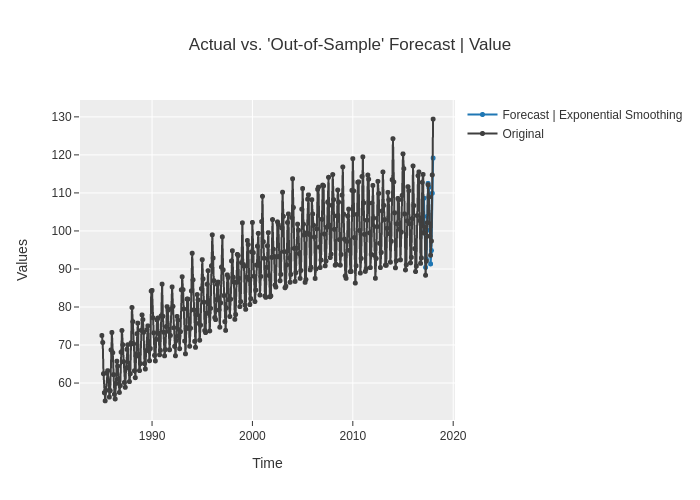

In [ ]:
model = exp.create_model("exp_smooth")
y_predict = exp.predict_model(model)
#### Plot Out-of-Sample Forecasts
exp.plot_model(estimator=model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  2.1624  2.8047  0.0204  0.0201  0.7679  0.7918  0.8958
1     2015-01  2.8138  3.8925  0.0274  0.0269  1.0083  1.1069  0.8283
2     2016-01  3.3835  4.6377  0.0324  0.0320  1.2168  1.3224  0.7792
Mean      NaT  2.7866  3.7783  0.0268  0.0263  0.9977  1.0737  0.8344
SD        NaT  0.4988  0.7527  0.0049  0.0049  0.1834  0.2179  0.0478

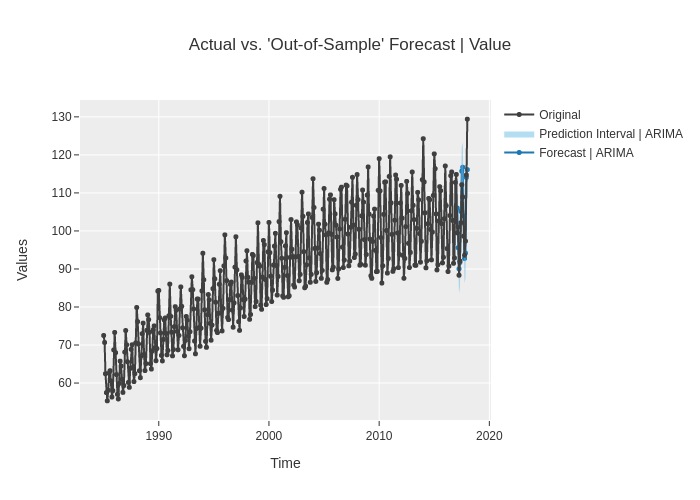

In [ ]:
## NOTE: Model that supports prediction intervals will plot them by default
model_pi = exp.create_model("arima")
exp.plot_model(estimator=model_pi)

In [ ]:
# Check Goodness of Fit
exp.check_stats(model)

Test   Test Name      Data             Property  \
0        Summary  Statistics  Residual               Length   
1        Summary  Statistics  Residual                 Mean   
2        Summary  Statistics  Residual               Median   
3        Summary  Statistics  Residual   Standard Deviation   
4        Summary  Statistics  Residual             Variance   
5        Summary  Statistics  Residual             Kurtosis   
6        Summary  Statistics  Residual             Skewness   
7        Summary  Statistics  Residual    # Distinct Values   
8    White Noise   Ljung-Box  Residual       Test Statictic   
9    White Noise   Ljung-Box  Residual       Test Statictic   
10   White Noise   Ljung-Box  Residual              p-value   
11   White Noise   Ljung-Box  Residual              p-value   
12   White Noise   Ljung-Box  Residual          White Noise   
13   White Noise   Ljung-Box  Residual          White Noise   
14  Stationarity         ADF  Residual         Stationarity   
15  Stationarity         ADF  Residual              p-value   
16  Stationarity         ADF  Residual       Test Statistic   
17  Stationarity         ADF  Residual    Critical Value 1%   
18  Stationarity         ADF  Residual    Critical Value 5%   
19  Stationarity         ADF  Residual   Critical Value 10%   
20  Stationarity        KPSS  Residual   Trend Stationarity   
21  Stationarity        KPSS  Residual              p-value   
22  Stationarity        KPSS  Residual       Test Statistic   
23  Stationarity        KPSS  Residual   Critical Value 10%   
24  Stationarity        KPSS  Residual    Critical Value 5%   
25  Stationarity        KPSS  Residual  Critical Value 2.5%   
26  Stationarity        KPSS  Residual    Critical Value 1%   
27     Normality     Shapiro  Residual            Normality   
28     Normality     Shapiro  Residual              p-value   

                     Setting      Value  
0                                 385.0  
1                             -0.015122  
2                             -0.022437  
3                              2.358891  
4                              5.564367  
5                              1.148343  
6                             -0.175039  
7                                 385.0  
8   {'alpha': 0.05, 'K': 24}  73.121381  
9   {'alpha': 0.05, 'K': 48}  91.877081  
10  {'alpha': 0.05, 'K': 24}   0.000001  
11  {'alpha': 0.05, 'K': 48}   0.000142  
12  {'alpha': 0.05, 'K': 24}      False  
13  {'alpha': 0.05, 'K': 48}      False  
14           {'alpha': 0.05}       True  
15           {'alpha': 0.05}        0.0  
16           {'alpha': 0.05} -11.034876  
17           {'alpha': 0.05}  -3.447862  
18           {'alpha': 0.05}  -2.869258  
19           {'alpha': 0.05}  -2.570881  
20           {'alpha': 0.05}       True  
21           {'alpha': 0.05}        0.1  
22           {'alpha': 0.05}   0.021027  
23           {'alpha': 0.05}      0.119  
24           {'alpha': 0.05}      0.146  
25           {'alpha': 0.05}      0.176  
26           {'alpha': 0.05}      0.216  
27           {'alpha': 0.05}      False  
28           {'alpha': 0.05}   0.006081

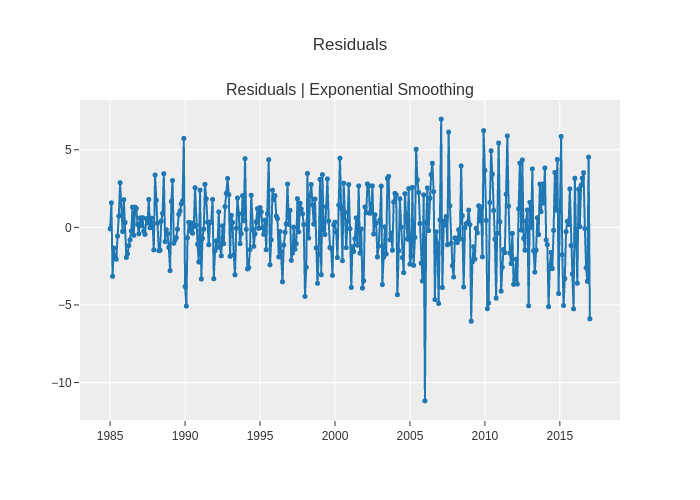

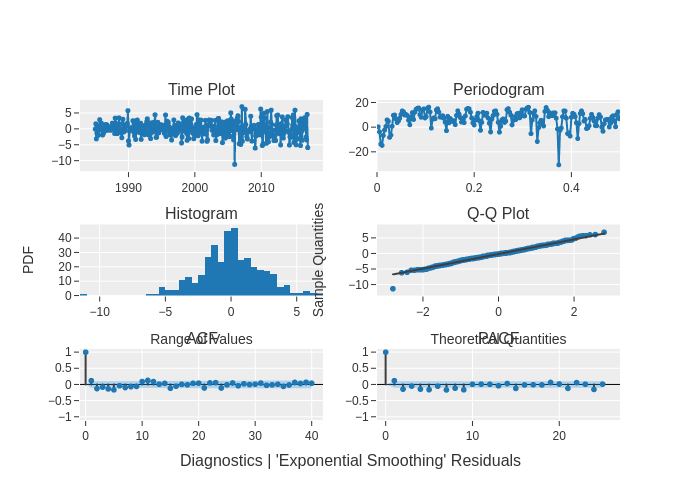

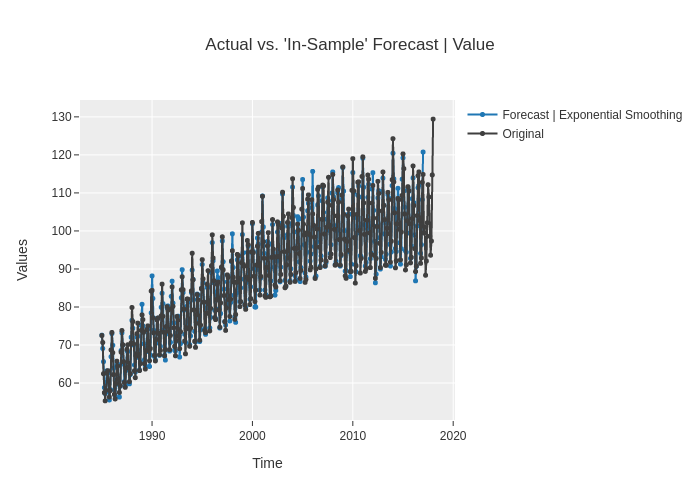

In [ ]:
# Plot Goodness of Fit (Plots based on model in-sample residuals)
exp.plot_model(model, plot='residuals')
exp.plot_model(model, plot='diagnostics')
exp.plot_model(model, plot='insample')

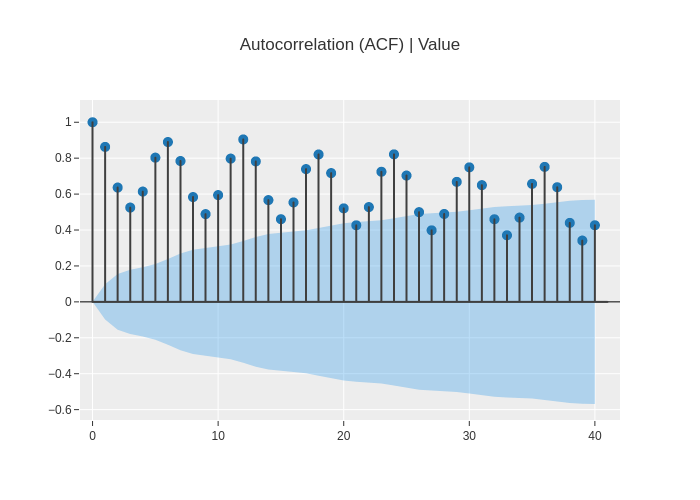

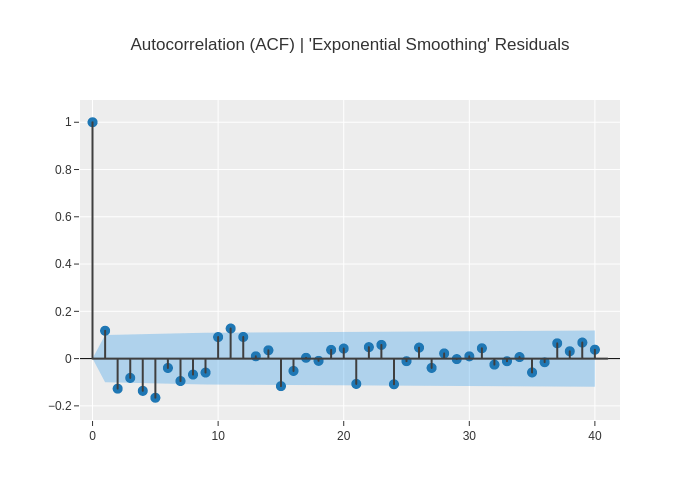

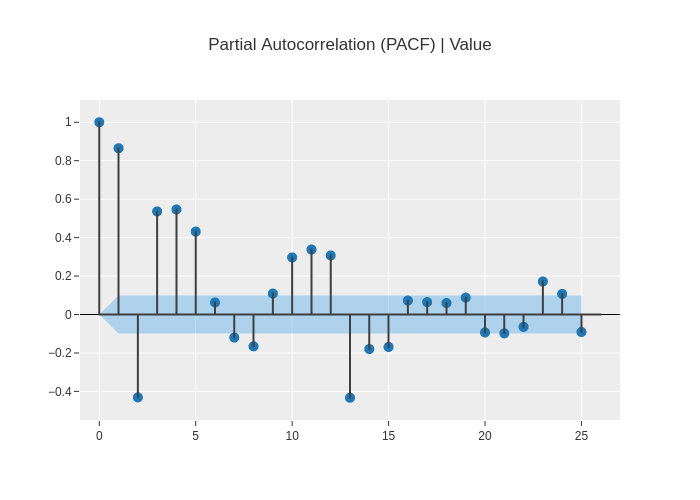

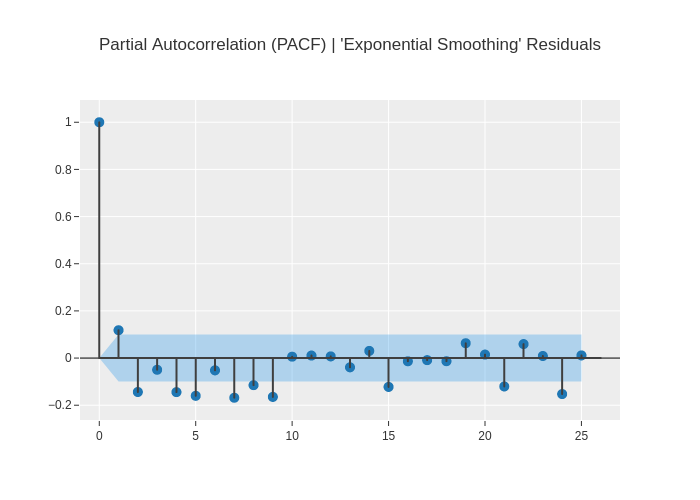

In [ ]:
# Compare Model residual ACF/PACF to original Time Series ACF/PACF
# 1. Do you see any visible trend or seasonality component that has not been captured in the model (i.e. still visible in the residual ACF/PACF)?
exp.plot_model(plot='acf')
exp.plot_model(model, plot='acf')

exp.plot_model(plot='pacf')
exp.plot_model(model, plot='pacf')

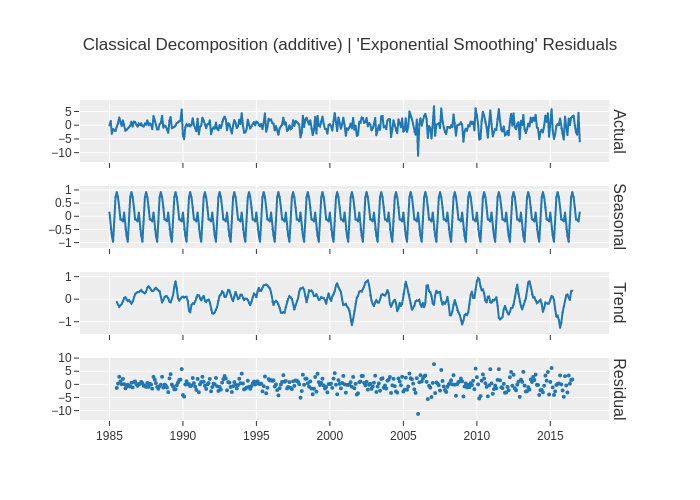

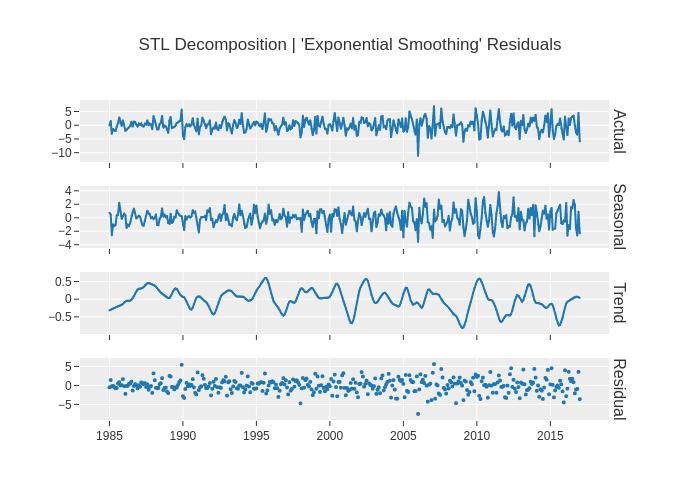

In [ ]:
# Check the decomposition of the residuals
# 1. Is the residual in the decomposition the largest component?
# 2. Do you see any visible trend or seasonality component that has not been captured in the model?
exp.plot_model(model, plot="decomp_classical")
exp.plot_model(model, plot="decomp_stl")

In [ ]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  3.9626  4.4123  0.0388  0.0379  1.4071  1.2456  0.7422
1     2015-01  2.6010  3.4872  0.0256  0.0253  0.9321  0.9917  0.8622
2     2016-01  3.2762  4.2195  0.0307  0.0312  1.1783  1.2032  0.8172
Mean      NaT  3.2799  4.0397  0.0317  0.0314  1.1725  1.1468  0.8072
SD        NaT  0.5559  0.3985  0.0054  0.0051  0.1940  0.1111  0.0495

ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, trend='add', use_boxcox=None,
                     use_brute=True)
ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, t

In [ ]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  3.9626  4.4123  0.0388  0.0379  1.4071  1.2456  0.7422
1     2015-01  2.6010  3.4872  0.0256  0.0253  0.9321  0.9917  0.8622
2     2016-01  3.2762  4.2195  0.0307  0.0312  1.1783  1.2032  0.8172
Mean      NaT  3.2799  4.0397  0.0317  0.0314  1.1725  1.1468  0.8072
SD        NaT  0.5559  0.3985  0.0054  0.0051  0.1940  0.1111  0.0495

ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, trend='add', use_boxcox=None,
                     use_brute=True)
ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, t

Model     MAE    RMSE    MAPE   SMAPE   MASE   RMSSE  \
0  Exponential Smoothing  3.3861  4.9796  0.0312  0.0315  1.208  1.3955   

       R2  
0  0.7938

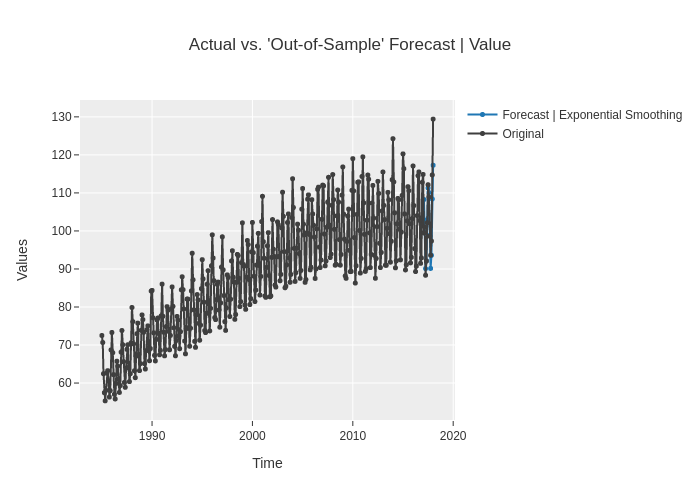

In [ ]:
y_predict = exp.predict_model(tuned_model)
exp.plot_model(estimator=tuned_model)

In [ ]:
# Random Grid Search with different number of iterations
tuned_model = exp.tune_model(model, search_algorithm="random", n_iter=5)
print(model)
print(tuned_model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  5.2981  6.3954  0.0522  0.0503  1.8813  1.8054  0.4585
1     2015-01  2.9165  3.7438  0.0285  0.0281  1.0451  1.0646  0.8411
2     2016-01  2.8284  3.4193  0.0268  0.0272  1.0172  0.9750  0.8800
Mean      NaT  3.6810  4.5195  0.0358  0.0352  1.3146  1.2817  0.7265
SD        NaT  1.1440  1.3331  0.0116  0.0107  0.4009  0.3722  0.1902

ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, trend='add', use_boxcox=None,
                     use_brute=True)
ExponentialSmoothing(damped_trend=False, damping_trend=None, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', method=None,
                     minimize_kwargs=None, optimized=True, remove_bias=False,
                     seasonal='mul', smoothing_level=None,
                     smoothing_seasonal=None, smoothing_trend=None, sp=12,
                     start_params=None, t

### Reduced Regressors: Random Forest (with internal conditional deseasonalize and detrending)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  1.7045  2.0774  0.0170  0.0168  0.6053  0.5865  0.9429
1     2015-01  2.9799  4.0154  0.0301  0.0294  1.0678  1.1419  0.8173
2     2016-01  4.1686  4.7718  0.0414  0.0406  1.4992  1.3607  0.7662
Mean      NaT  2.9510  3.6215  0.0295  0.0289  1.0574  1.0297  0.8421
SD        NaT  1.0062  1.1347  0.0100  0.0097  0.3650  0.3259  0.0742

Model     MAE    RMSE   MAPE   SMAPE    MASE  RMSSE     R2
0  RandomForestRegressor  3.7982  5.1562  0.035  0.0352  1.3551  1.445  0.779

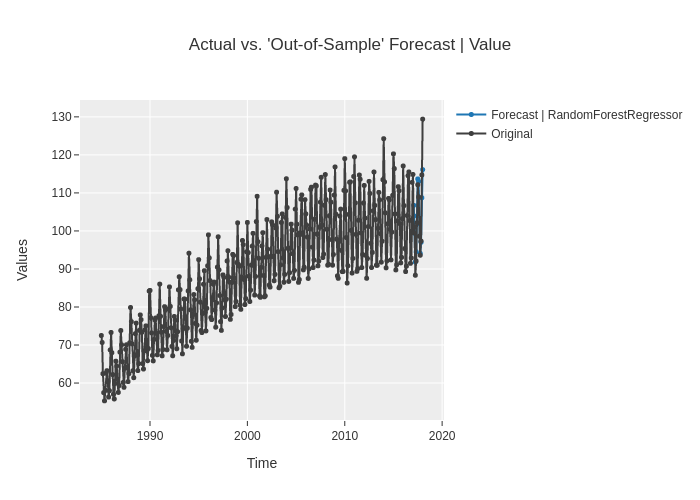

In [ ]:
model = exp.create_model("rf_cds_dt")
y_predict = exp.predict_model(model)
exp.plot_model(estimator=model)

In [ ]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  1.3971  1.8539  0.0137  0.0138  0.4961  0.5234  0.9545
1     2015-01  2.6292  3.5083  0.0258  0.0254  0.9422  0.9977  0.8605
2     2016-01  3.4733  3.8564  0.0336  0.0335  1.2492  1.0996  0.8473
Mean      NaT  2.4999  3.0729  0.0244  0.0242  0.8958  0.8735  0.8874
SD        NaT  0.8525  0.8736  0.0082  0.0081  0.3092  0.2511  0.0477

BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='squared_error',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100, n_jobs=-1,
                                                    oob_

In [ ]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  1.3971  1.8539  0.0137  0.0138  0.4961  0.5234  0.9545
1     2015-01  2.6292  3.5083  0.0258  0.0254  0.9422  0.9977  0.8605
2     2016-01  3.4733  3.8564  0.0336  0.0335  1.2492  1.0996  0.8473
Mean      NaT  2.4999  3.0729  0.0244  0.0242  0.8958  0.8735  0.8874
SD        NaT  0.8525  0.8736  0.0082  0.0081  0.3092  0.2511  0.0477

BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='squared_error',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100, n_jobs=-1,
                                                    oob_

Model    MAE    RMSE    MAPE   SMAPE    MASE   RMSSE  \
0  RandomForestRegressor  2.936  4.5263  0.0279  0.0274  1.0475  1.2685   

       R2  
0  0.8297

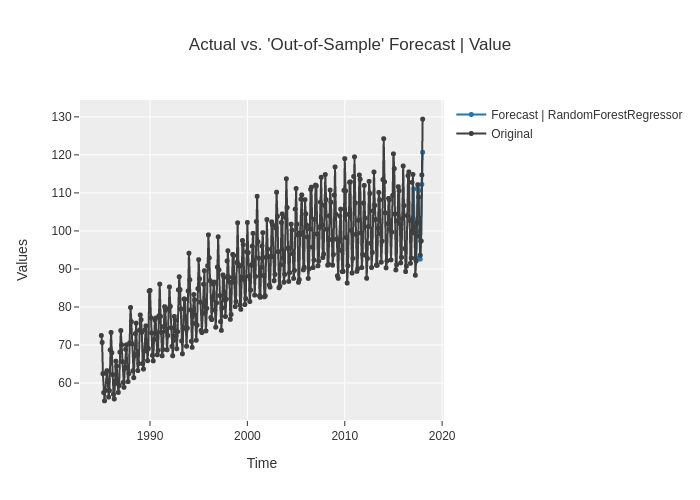

In [ ]:
y_predict = exp.predict_model(tuned_model)
exp.plot_model(estimator=tuned_model)

## Getting Ready for Productionization 

### Finalizing Models

cutoff     MAE    RMSE    MAPE   SMAPE    MASE   RMSSE      R2
0     2014-01  4.6390  5.4307  0.0454  0.0440  1.6473  1.5331  0.6095
1     2015-01  3.2197  3.7809  0.0315  0.0310  1.1538  1.0752  0.8380
2     2016-01  2.7215  3.4954  0.0255  0.0259  0.9788  0.9967  0.8746
Mean      NaT  3.5267  4.2357  0.0341  0.0336  1.2599  1.2017  0.7740
SD        NaT  0.8123  0.8530  0.0083  0.0076  0.2831  0.2365  0.1173

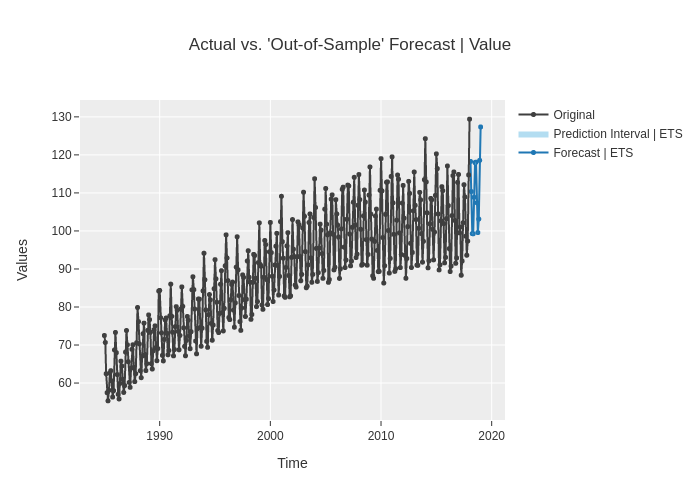

2018-02    118.2753
2018-03    110.3674
2018-04     99.2935
2018-05     99.2476
2018-06    108.8467
2018-07    117.9600
2018-08    118.0982
2018-09    107.4087
2018-10     99.5759
2018-11    103.1265
2018-12    118.5631
2019-01    127.3458
Freq: M, Name: Value, dtype: float64

In [ ]:
model = exp.create_model("ets")
tuned_model = exp.tune_model(model, search_algorithm='grid')

# Trains the model with the best hyperparameters on the entire dataset now
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)
exp.predict_model(final_model)

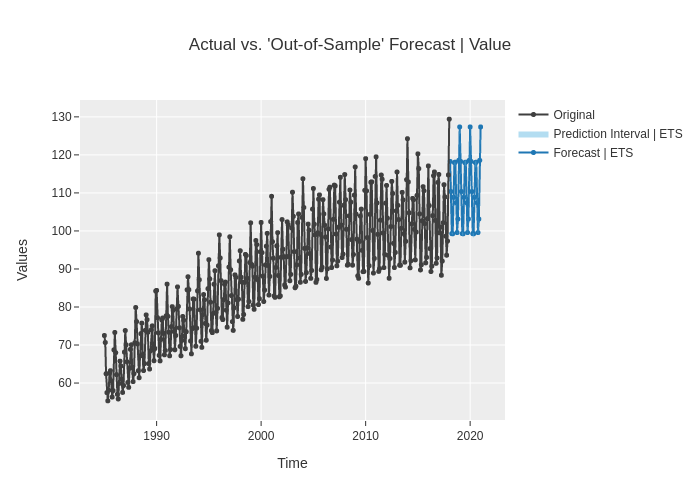

In [ ]:
## NOTE: You can choose to predict further out in the horizon as well (if needed)
# Example here shows forecasting out 36 months instead of the default of 12
exp.plot_model(estimator=final_model, data_kwargs={'fh': 36})

### Save model pickle file

In [ ]:
exp.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved


(AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='mul', freq=None, full_output=True, ignore_inf_ic=True,
         information_criterion='aic', initial_level=None, initial_seasonal=None,
         initial_trend=None, initialization_method='estimated', maxiter=1000,
         missing='none', n_jobs=None, restrict=True, return_params=False,
         seasonal='mul', sp=12, start_params=None, trend=None),
 'my_final_model.pkl')

## Load Model 

**Usually done in another session**

In [ ]:
exp_load = TimeSeriesExperiment()
loaded_model = exp_load.load_model("my_final_model")

>>> from pycaret.time_series import TSForecastingExperiment
Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Should match predictions from before the save and load
exp_load.predict_model(loaded_model)

2018-02    118.2753
2018-03    110.3674
2018-04     99.2935
2018-05     99.2476
2018-06    108.8467
2018-07    117.9600
2018-08    118.0982
2018-09    107.4087
2018-10     99.5759
2018-11    103.1265
2018-12    118.5631
2019-01    127.3458
Freq: M, dtype: float64

## Auto Create

### Compare Models

In [ ]:
best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

Model      MAE  \
auto_arima                                              Auto ARIMA   2.4911   
snaive                                   Seasonal Naive Forecaster   2.6796   
arima                                                        ARIMA   2.7866   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending    2.951   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   3.0672   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   3.1818   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   3.2985   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   3.4176   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   3.4523   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   3.4532   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   3.4532   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   3.4532   
theta                                             Theta Forecaster   3.5951   
ets                                                            ETS   3.6865   
exp_smooth                                   Exponential Smoothing   3.6861   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   3.6685   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   3.7804   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   3.7448   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   4.0082   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   4.1234   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   7.1189   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   7.5453   
croston                                                    Croston   8.0142   
polytrend                              Polynomial Trend Forecaster   9.6751   
grand_means                                 Grand Means Forecaster  15.4888   
naive                                             Naive Forecaster  17.6139   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...  26.2887   

                    RMSE    MAPE   SMAPE    MASE   RMSSE       R2  TT (Sec)  
auto_arima        3.0441  0.0242   0.024  0.8922  0.8652   0.8917   77.3367  
snaive            3.6629  0.0253  0.0252  0.9595  1.0411   0.8406    0.0133  
arima             3.7783  0.0268  0.0263  0.9977  1.0737   0.8344    0.0833  
rf_cds_dt         3.6215  0.0295  0.0289  1.0574  1.0297   0.8421    1.1167  
gbr_cds_dt        3.7121  0.0308  0.0302  1.0994  1.0556   0.8297    0.1500  
et_cds_dt         3.8854  0.0318  0.0311  1.1395  1.1043   0.8231    1.0200  
lightgbm_cds_dt   4.0181  0.0327  0.0321  1.1814   1.142   0.8109    0.1600  
huber_cds_dt      4.0632   0.034  0.0333  1.2233  1.1543   0.8094    0.0500  
br_cds_dt         4.0953  0.0344  0.0337  1.2355  1.1633    0.806    0.0400  
lr_cds_dt         4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0433  
ridge_cds_dt      4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0400  
lar_cds_dt        4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0433  
theta             4.3325  0.0349  0.0344  1.2848  1.2297    0.776    0.0467  
ets               4.4044  0.0357  0.0352  1.3172  1.2499   0.7638    0.2933  
exp_smooth        4.4038  0.0357  0.0352   1.317  1.2497   0.7638    0.5967  
en_cds_dt         4.3129  0.0368  0.0359  1.3128  1.2251    0.785    0.0433  
knn_cds_dt        4.5039  0.0375  0.0366  1.3537    1.28   0.7627    0.8533  
ada_cds_dt        4.3907  0.0376  0.0368  1.3407  1.2476   0.7776    0.1467  
lasso_cds_dt      4.6542  0.0403  0.0393  1.4342   1.322   0.7495    0.0433  
dt_cds_dt         5.1526  0.0407  0.0396  1.4748  1.4629   0.6889    0.0467  
omp_cds_dt        7.8104  0.0718  0.0687  2.5464   2.218   0.2941    0.0400  
llar_cds_dt       8.2716  0.0762  0.0727  2.7006  2.3499   0.2133    0.0400  
croston           9.3753  0.0795  0.0781  2.8678  2.66

[AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
           information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
           max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
           n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
           random_state=42, scoring='mse', scoring_args=None, seasonal=True,
           seasonal_test='ocsb', seasonal_test_args=None, sp=12, start_P=1,
           start_Q=1, start_p=2, start_params=None, ...),
 NaiveForecaster(sp=12, strategy='last', window_length=None),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True)]

In [ ]:
compare_metrics = exp.pull()
compare_metrics

Model      MAE  \
auto_arima                                              Auto ARIMA   2.4911   
snaive                                   Seasonal Naive Forecaster   2.6796   
arima                                                        ARIMA   2.7866   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending    2.951   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...   3.0672   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   3.1818   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...   3.2985   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   3.4176   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   3.4523   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   3.4532   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   3.4532   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...   3.4532   
theta                                             Theta Forecaster   3.5951   
ets                                                            ETS   3.6865   
exp_smooth                                   Exponential Smoothing   3.6861   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   3.6685   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   3.7804   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending   3.7448   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   4.0082   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending   4.1234   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   7.1189   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   7.5453   
croston                                                    Croston   8.0142   
polytrend                              Polynomial Trend Forecaster   9.6751   
grand_means                                 Grand Means Forecaster  15.4888   
naive                                             Naive Forecaster  17.6139   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...  26.2887   

                    RMSE    MAPE   SMAPE    MASE   RMSSE       R2  TT (Sec)  
auto_arima        3.0441  0.0242   0.024  0.8922  0.8652   0.8917   77.3367  
snaive            3.6629  0.0253  0.0252  0.9595  1.0411   0.8406    0.0133  
arima             3.7783  0.0268  0.0263  0.9977  1.0737   0.8344    0.0833  
rf_cds_dt         3.6215  0.0295  0.0289  1.0574  1.0297   0.8421    1.1167  
gbr_cds_dt        3.7121  0.0308  0.0302  1.0994  1.0556   0.8297    0.1500  
et_cds_dt         3.8854  0.0318  0.0311  1.1395  1.1043   0.8231    1.0200  
lightgbm_cds_dt   4.0181  0.0327  0.0321  1.1814   1.142   0.8109    0.1600  
huber_cds_dt      4.0632   0.034  0.0333  1.2233  1.1543   0.8094    0.0500  
br_cds_dt         4.0953  0.0344  0.0337  1.2355  1.1633    0.806    0.0400  
lr_cds_dt         4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0433  
ridge_cds_dt      4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0400  
lar_cds_dt        4.0937  0.0344  0.0337  1.2358  1.1629   0.8063    0.0433  
theta             4.3325  0.0349  0.0344  1.2848  1.2297    0.776    0.0467  
ets               4.4044  0.0357  0.0352  1.3172  1.2499   0.7638    0.2933  
exp_smooth        4.4038  0.0357  0.0352   1.317  1.2497   0.7638    0.5967  
en_cds_dt         4.3129  0.0368  0.0359  1.3128  1.2251    0.785    0.0433  
knn_cds_dt        4.5039  0.0375  0.0366  1.3537    1.28   0.7627    0.8533  
ada_cds_dt        4.3907  0.0376  0.0368  1.3407  1.2476   0.7776    0.1467  
lasso_cds_dt      4.6542  0.0403  0.0393  1.4342   1.322   0.7495    0.0433  
dt_cds_dt         5.1526  0.0407  0.0396  1.4748  1.4629   0.6889    0.0467  
omp_cds_dt        7.8104  0.0718  0.0687  2.5464   2.218   0.2941    0.0400  
llar_cds_dt       8.2716  0.0762  0.0727  2.7006  2.3499   0.2133    0.0400  
croston           9.3753  0.0795  0.0781  2.8678  2.66

* Note that some models like BATS and TBATS are disabled by default. 
* You can enable them by setting `turbo = False`

In [ ]:
# _ = exp.compare_models(fold=fold, sort='smape', n_select=3, turbo=False)

### Tune Best Models

In [ ]:
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
best_tuned_models

IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .                   16:37:27
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .                 Auto ARIMA

Empty DataFrame
Columns: [cutoff, MAE, RMSE, MAPE, SMAPE, MASE, RMSSE, R2]
Index: []

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


TerminatedWorkerError: ignored

### Blend Best Models

#### Mean Blender

In [ ]:
mean_blender = exp.blend_models(best_tuned_models, method='mean')

In [ ]:
y_predict = exp.predict_model(mean_blender)
exp.plot_model(estimator=mean_blender)

#### Median Blender

In [ ]:
median_blender = exp.blend_models(best_tuned_models, method='median')

In [ ]:
y_predict = exp.predict_model(median_blender)
exp.plot_model(estimator=median_blender)

#### Voting Blender

In [ ]:
top_model_metrics = compare_metrics.iloc[0:3]['SMAPE']
display(top_model_metrics)

top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

In [ ]:
voting_blender = exp.blend_models(best_tuned_models, method='voting', weights=top_model_weights.values.tolist())

In [ ]:
y_predict = exp.predict_model(voting_blender)
print(y_predict)
exp.plot_model(estimator=voting_blender)

## Save and Load Model

In [ ]:
_ = exp.save_model(voting_blender, "my_blender")

In [ ]:
loaded_exp = TimeSeriesExperiment()
m = loaded_exp.load_model("my_blender")
# Predictions should be same as before the model was saved and loaded
loaded_exp.predict_model(m)

## Prediction Customization

In [ ]:
model = exp.create_model("auto_arima")

In [ ]:
# Default prediction
exp.predict_model(model)

In [ ]:
# With Prediction Interval (default alpha = 0.05)
exp.predict_model(model, return_pred_int=True)

In [ ]:
# With Prediction Interval (custom alpha = 0.2)
exp.predict_model(model, return_pred_int=True, alpha=0.2)

In [ ]:
# Increased forecast horizon to 2 years instead of the original 1 year
exp.predict_model(model, fh = np.arange(1, 25))

In [ ]:
# For models that do not produce a prediction interval --> returns NA values
model = exp.create_model("lr_cds_dt")
exp.predict_model(model, return_pred_int=True)

## Enforce Prediction Intervals

In [ ]:
exp = TimeSeriesExperiment()

# enforce_opi restricts the models to only those that provide a prediction interval
# This also adds an extra metric called COV_PROB.
# COV_PROB gives the percentage of actuals that are within the prediction interval.
exp.setup(data=y, fh=fh, fold=fold, enforce_pi=True)
best_model = exp.compare_models()

## Types of Window Splitters

### Sliding Window Splitter

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='sliding')
model = exp.create_model("ets")

### Expanding/Rolling Window

* They are identical

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expanding')
model = exp.create_model("ets")

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='rolling')
model = exp.create_model("ets")

## Error Handling

In [ ]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expanding')
except ValueError as error:
    print(error)